In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from collections import defaultdict

possible_columns
* node index
* paper code
* degree
* eigenvec
* kcore
* pagerank
* affiliation

* deg_avg
* deg_max
* deg_min
* year
* conf
* cs
* de
* se
* th
* pos

In [2]:
property2eval2model = defaultdict(dict) # "all" or "degree" ... -> "acc" or "precision_micro" ... -> "model name" 

In [681]:
target_col = "th"

In [682]:
usecols = ['node index', 'paper code', 'degree', 'eigenvec', 'kcore', 'pagerank', 'affiliation', 
           'deg_avg', 'deg_max', 'deg_min', 'year', 'conf', 'cs', 'de', 'se', 'th', 'pos']

In [683]:
if target_col != 'all':
    usecols.remove(target_col)
    print(usecols)

['node index', 'paper code', 'degree', 'eigenvec', 'kcore', 'pagerank', 'affiliation', 'deg_avg', 'deg_max', 'deg_min', 'year', 'conf', 'cs', 'de', 'se', 'pos']


In [684]:
data = pd.read_csv("dataset/DBLP2/whole_data.txt", usecols=usecols)

In [685]:
data.head()

,node index,paper code,degree,eigenvec,kcore,pagerank,affiliation,deg_avg,deg_max,deg_min,year,conf,cs,de,se,pos
0,23,conf/aaai/0003MGF14,7.0,0.000031,5.0,0.000100,'Autodesk Research- Canada- Senior Research Sc...,37.75,63.0,7.0,2014,'AAAI',1,0,0,0
1,24,conf/aaai/0003MGF14,20.0,0.000044,8.0,0.000248,'Autodesk Research- Canada',37.75,63.0,7.0,2014,'AAAI',1,0,0,1
2,25,conf/aaai/0003MGF14,63.0,0.000449,8.0,0.000861,'Autodesk Research- Canada',37.75,63.0,7.0,2014,'AAAI',1,0,0,1
3,26,conf/aaai/0003MGF14,61.0,0.000475,8.0,0.000913,'Autodesk Research- Canada',37.75,63.0,7.0,2014,'AAAI',1,0,0,2
4,325,conf/aaai/AlonFMT13,91.0,0.000750,6.0,0.001504,'Tel Aviv University and Microsoft Research- I...,27.75,91.0,1.0,2013,'AAAI',1,0,0,0


### Encoding

In [686]:
# Label encoding location and salary
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
if target_col != "affiliation":
    data['affiliation'] = le.fit_transform(data['affiliation'])
if target_col != "conf":
    data['conf'] = le.fit_transform(data['conf'])

### Splitting

In [687]:
from sklearn.model_selection import train_test_split

In [688]:
data.head()

,node index,paper code,degree,eigenvec,kcore,pagerank,affiliation,deg_avg,deg_max,deg_min,year,conf,cs,de,se,pos
0,23,conf/aaai/0003MGF14,7.0,0.000031,5.0,0.000100,134,37.75,63.0,7.0,2014,0,1,0,0,0
1,24,conf/aaai/0003MGF14,20.0,0.000044,8.0,0.000248,133,37.75,63.0,7.0,2014,0,1,0,0,1
2,25,conf/aaai/0003MGF14,63.0,0.000449,8.0,0.000861,133,37.75,63.0,7.0,2014,0,1,0,0,1
3,26,conf/aaai/0003MGF14,61.0,0.000475,8.0,0.000913,133,37.75,63.0,7.0,2014,0,1,0,0,2
4,325,conf/aaai/AlonFMT13,91.0,0.000750,6.0,0.001504,3254,27.75,91.0,1.0,2013,0,1,0,0,0


In [689]:
X = data.iloc[:,2:-1].values
Y = data.iloc[:,-1].values
print(X[:5,:])
print(Y[:5])

[[7.00000000e+00 3.07475004e-05 5.00000000e+00 9.95349519e-05
  1.34000000e+02 3.77500000e+01 6.30000000e+01 7.00000000e+00
  2.01400000e+03 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.00000000e+01 4.37764624e-05 8.00000000e+00 2.48092617e-04
  1.33000000e+02 3.77500000e+01 6.30000000e+01 7.00000000e+00
  2.01400000e+03 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [6.30000000e+01 4.49030103e-04 8.00000000e+00 8.61414383e-04
  1.33000000e+02 3.77500000e+01 6.30000000e+01 7.00000000e+00
  2.01400000e+03 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [6.10000000e+01 4.74524855e-04 8.00000000e+00 9.13089486e-04
  1.33000000e+02 3.77500000e+01 6.30000000e+01 7.00000000e+00
  2.01400000e+03 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [9.10000000e+01 7.50294893e-04 6.00000000e+00 1.50362633e-03
  3.25400000e+03 2.77500000e+01 9.10000000e+01 1.00000000e+00
  2.01300000e+03 0.00000000e+00 1.00000000e+00 0.00000000e+0

In [690]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)

### Scaling

In [691]:
from sklearn.preprocessing import StandardScaler

In [692]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Evaluation

In [693]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred, avg='micro'):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average=avg)
    recall = recall_score(y_test, pred, average=avg)
    f1 = f1_score(y_test, pred, average=avg)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy:{}, Precision:{}, Recall:{}, F1:{}'.format(accuracy, precision, recall, f1))
    
    return accuracy, precision, recall, f1

In [694]:
import numpy as np

def fig_confusion_mat(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    precision_mic = precision_score(y_test, pred, average='micro')
    precision_mac = precision_score(y_test, pred, average='macro')
    recall_mic = recall_score(y_test, pred, average='micro')
    recall_mac = recall_score(y_test, pred, average='macro')
    f1_mic = f1_score(y_test, pred, average='micro')
    f1_mac = f1_score(y_test, pred, average='macro')
    
    # recall
    rec_bar = []
    for i in range(confusion.shape[0]):
        row_sum = np.sum(confusion[i])
        ans = confusion[i,i]
        rec_bar.append(ans / row_sum)
    plt.figure(dpi=100, figsize=(4,3))
    plt.bar(range(len(rec_bar)), rec_bar)
    plt.title("Recall - %.2f / %.2f" % (recall_mic, recall_mac))
    plt.xlabel("Class")
    ax = plt.gca()
    ax.set_ylim([0, 1])
    plt.show()
    plt.close()
    
    # precision
    prec_bar = []
    for i in range(confusion.shape[0]):
        row_sum = np.sum(confusion[i])
        ans = confusion[i,i]
        prec_bar.append(ans / row_sum)
    plt.figure(dpi=100, figsize=(4,3))
    plt.bar(range(len(prec_bar)), prec_bar)
    plt.title("Precision - %.2f / %.2f" % (precision_mic, precision_mac))
    plt.xlabel("Class")
    ax = plt.gca()
    ax.set_ylim([0, 1])
    plt.show()
    plt.close()
    
    # f1-score
    f1_bar = []
    for i in range(len(rec_bar)):
        f1_bar.append(2 * ( (prec_bar[i] * rec_bar[i]) / (prec_bar[i] + rec_bar[i]) ))
    plt.figure(dpi=100, figsize=(4,3))
    plt.bar(range(len(f1_bar)), f1_bar)
    plt.title("F1 Score - %.2f / %.2f" % (f1_mic, f1_mac))
    plt.xlabel("Class")
    ax = plt.gca()
    ax.set_ylim([0, 1])
    plt.show()
    plt.close()
    

In [695]:
def update_result(modelname, result_dict):
    for k,v in result_dict.items():
        if k not in property2eval2model[target_col]:
            property2eval2model[target_col][k] = {}
        property2eval2model[target_col][k][modelname] = v

## Model

### Random Forest

In [696]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [697]:
Y_pred = classifier.predict(X_test)

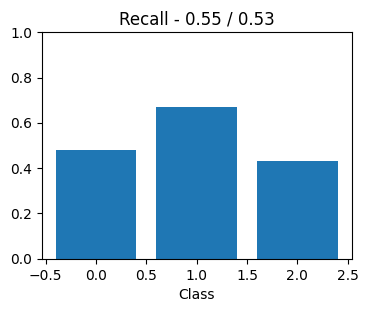

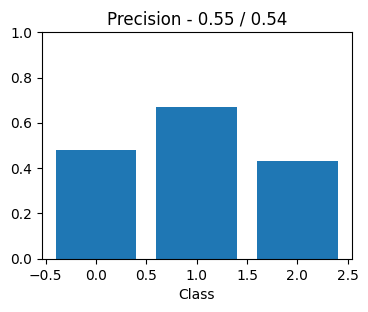

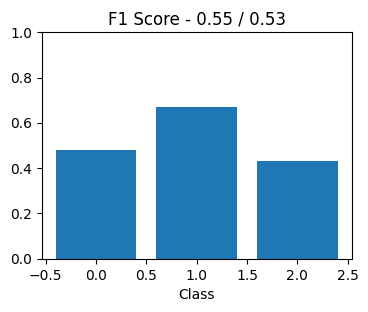

In [698]:
fig_confusion_mat(Y_test, Y_pred)

In [699]:
# print(pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted']))

In [700]:
accuracy, precision_micro, recall_micro, f1_micro = get_clf_eval(Y_test, Y_pred, avg='micro')

Confusion Matrix
[[ 957  761  272]
 [ 597 2147  454]
 [ 374  760  860]]
Accuracy:0.5519353940406572, Precision:0.5519353940406572, Recall:0.5519353940406572, F1:0.5519353940406572


In [701]:
accuracy, precision_macro, recall_macro, f1_macro = get_clf_eval(Y_test, Y_pred, avg='macro')

Confusion Matrix
[[ 957  761  272]
 [ 597 2147  454]
 [ 374  760  860]]
Accuracy:0.5519353940406572, Precision:0.5413155138453594, Recall:0.5278518341481222, F1:0.5314539999786496


In [702]:
result_dict = { "accuracy" : accuracy,
               "precision_micro" : precision_micro,
               "precision_macro" : precision_macro,
               "recall_micro" : recall_micro,
               "recall_macro" : recall_macro,
               "f1_micro" : f1_micro,
               "f1_macro" : f1_macro    
}

In [703]:
update_result("RandomForest", result_dict)

### Decision Tree

In [704]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, Y_train)
dtree_predictions = dtree_model.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(Y_test, dtree_predictions)
print(cm)

[[ 114 1331  545]
 [ 104 2705  389]
 [  92 1386  516]]


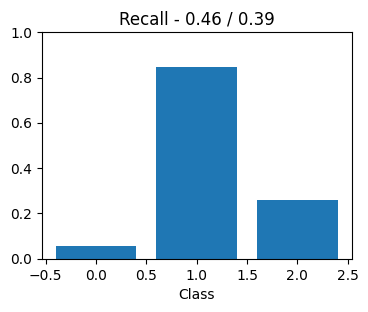

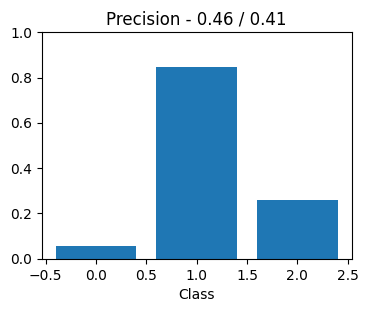

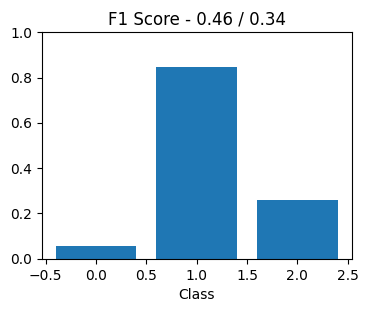

In [705]:
fig_confusion_mat(Y_test, dtree_predictions)

In [706]:
accuracy, precision_micro, recall_micro, f1_micro = get_clf_eval(Y_test, dtree_predictions, avg='micro')

Confusion Matrix
[[ 114 1331  545]
 [ 104 2705  389]
 [  92 1386  516]]
Accuracy:0.4643553327763854, Precision:0.4643553327763854, Recall:0.4643553327763854, F1:0.4643553327763854


In [707]:
accuracy, precision_macro, recall_macro, f1_macro = get_clf_eval(Y_test, dtree_predictions, avg='macro')

Confusion Matrix
[[ 114 1331  545]
 [ 104 2705  389]
 [  92 1386  516]]
Accuracy:0.4643553327763854, Precision:0.4074991339065894, Recall:0.38730130395565476, F1:0.34213073718118836


In [708]:
result_dict = { "accuracy" : accuracy,
               "precision_micro" : precision_micro,
               "precision_macro" : precision_macro,
               "recall_micro" : recall_micro,
               "recall_macro" : recall_macro,
               "f1_micro" : f1_micro,
               "f1_macro" : f1_macro    
}

In [709]:
update_result("DecisionTree", result_dict)

### KNN

In [710]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, Y_train)

# accuracy on X_test
accuracy = knn.score(X_test, Y_test)
print(accuracy)

# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(Y_test, knn_predictions)
print(cm)

0.47897521581732105
[[ 744  902  344]
 [ 660 2091  447]
 [ 538  851  605]]


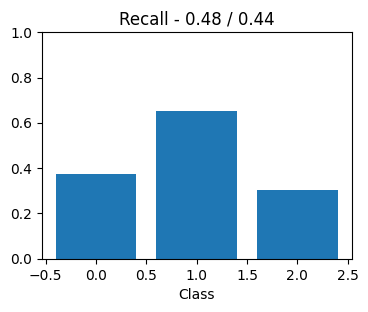

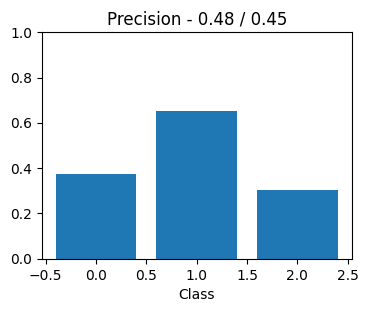

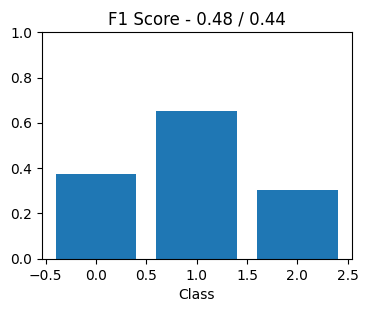

In [711]:
fig_confusion_mat(Y_test, knn_predictions)

In [712]:
accuracy, precision_micro, recall_micro, f1_micro = get_clf_eval(Y_test, knn_predictions, avg='micro')

Confusion Matrix
[[ 744  902  344]
 [ 660 2091  447]
 [ 538  851  605]]
Accuracy:0.47897521581732105, Precision:0.47897521581732105, Recall:0.47897521581732105, F1:0.47897521581732105


In [713]:
accuracy, precision_macro, recall_macro, f1_macro = get_clf_eval(Y_test, knn_predictions, avg='macro')

Confusion Matrix
[[ 744  902  344]
 [ 660 2091  447]
 [ 538  851  605]]
Accuracy:0.47897521581732105, Precision:0.4534853015623607, Recall:0.4437085770906328, F1:0.44307696659637114


In [714]:
result_dict = { "accuracy" : accuracy,
               "precision_micro" : precision_micro,
               "precision_macro" : precision_macro,
               "recall_micro" : recall_micro,
               "recall_macro" : recall_macro,
               "f1_micro" : f1_micro,
               "f1_macro" : f1_macro    
}

In [715]:
update_result("KNN", result_dict)

### Naive Bayes

In [716]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)

# accuracy on X_test
accuracy = gnb.score(X_test, Y_test)
print(accuracy)

# creating a confusion matrix
cm = confusion_matrix(Y_test, gnb_predictions)
print(cm)

0.44514062935115567
[[ 578 1357   55]
 [ 538 2549  111]
 [ 590 1334   70]]


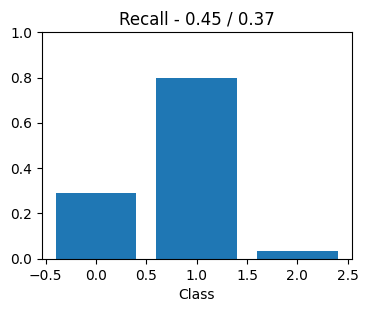

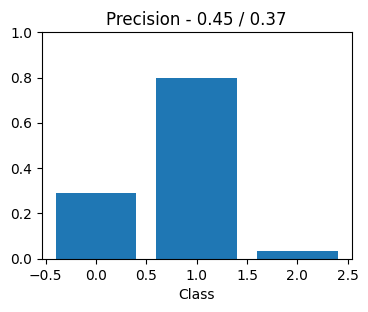

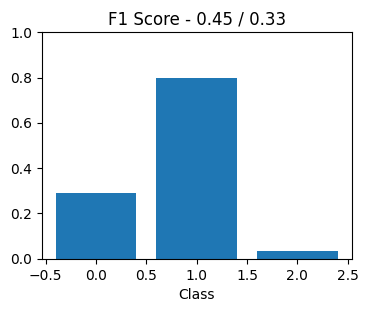

In [717]:
fig_confusion_mat(Y_test, gnb_predictions)

In [718]:
accuracy, precision_micro, recall_micro, f1_micro = get_clf_eval(Y_test, gnb_predictions, avg='micro')

Confusion Matrix
[[ 578 1357   55]
 [ 538 2549  111]
 [ 590 1334   70]]
Accuracy:0.44514062935115567, Precision:0.44514062935115567, Recall:0.44514062935115567, F1:0.44514062935115567


In [719]:
accuracy, precision_macro, recall_macro, f1_macro = get_clf_eval(Y_test, gnb_predictions, avg='macro')

Confusion Matrix
[[ 578 1357   55]
 [ 538 2549  111]
 [ 590 1334   70]]
Accuracy:0.44514062935115567, Precision:0.3739549238565026, Recall:0.37420608005623257, F1:0.3265741454915031


In [720]:
result_dict = { "accuracy" : accuracy,
               "precision_micro" : precision_micro,
               "precision_macro" : precision_macro,
               "recall_micro" : recall_micro,
               "recall_macro" : recall_macro,
               "f1_micro" : f1_micro,
               "f1_macro" : f1_macro    
}

In [721]:
update_result("NaiveBayes", result_dict)

### MLP

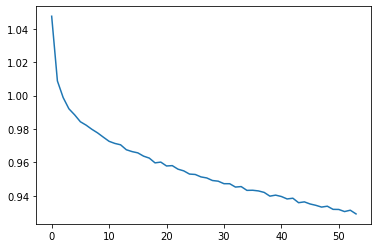

In [722]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(64,32,16), max_iter=300, activation='relu', solver='adam', learning_rate_init=0.001, random_state=1, early_stopping=True, n_iter_no_change=20)

#Fitting the training data to the network
classifier.fit(X_train, Y_train)
plt.plot(classifier.loss_curve_)
plt.show()
plt.close()

#Predicting y for X_val
y_pred = classifier.predict(X_test)

#Importing Confusion Matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, Y_test)

In [723]:
#Printing the accuracy
# print("Accuracy of MLPClassifier :", accuracy(cm))
print(cm)

[[ 715  365  505]
 [1015 2592 1066]
 [ 260  241  423]]


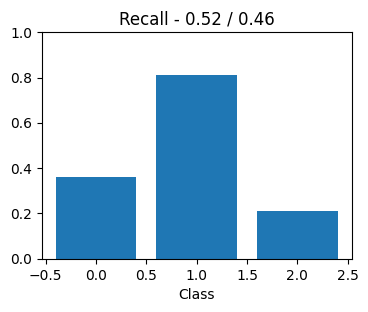

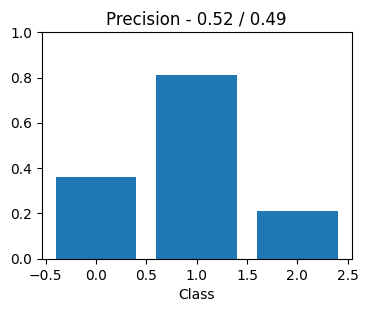

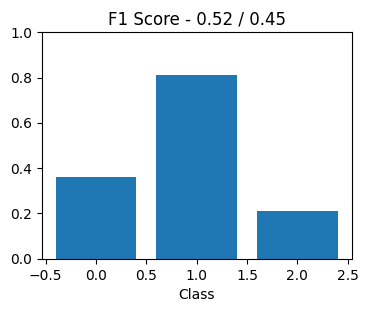

In [724]:
fig_confusion_mat(Y_test, y_pred)

In [725]:
accuracy, precision_micro, recall_micro, f1_micro = get_clf_eval(Y_test, y_pred, avg='micro')

Confusion Matrix
[[ 715 1015  260]
 [ 365 2592  241]
 [ 505 1066  423]]
Accuracy:0.519353940406572, Precision:0.519353940406572, Recall:0.519353940406572, F1:0.519353940406572


In [726]:
accuracy, precision_macro, recall_macro, f1_macro = get_clf_eval(Y_test, y_pred, avg='macro')

Confusion Matrix
[[ 715 1015  260]
 [ 365 2592  241]
 [ 505 1066  423]]
Accuracy:0.519353940406572, Precision:0.48785736862368106, Recall:0.4606464860812903, F1:0.44951495248359813


In [727]:
result_dict = { "accuracy" : accuracy,
               "precision_micro" : precision_micro,
               "precision_macro" : precision_macro,
               "recall_micro" : recall_micro,
               "recall_macro" : recall_macro,
               "f1_micro" : f1_micro,
               "f1_macro" : f1_macro    
}

In [728]:
update_result("MLP", result_dict)

### Save Results

In [729]:
models = property2eval2model["all"]["accuracy"].keys()
xs = list(property2eval2model["all"].keys())
for modelname in models:
    for prop in property2eval2model.keys():
        with open("nongraph_results/" + modelname + "_" + prop + ".txt", "w") as f:
            for x in xs:
                f.write(x + "\t" + str(property2eval2model[prop][x][modelname]) + "\n")

### Aggregate Result

In [730]:
# per model

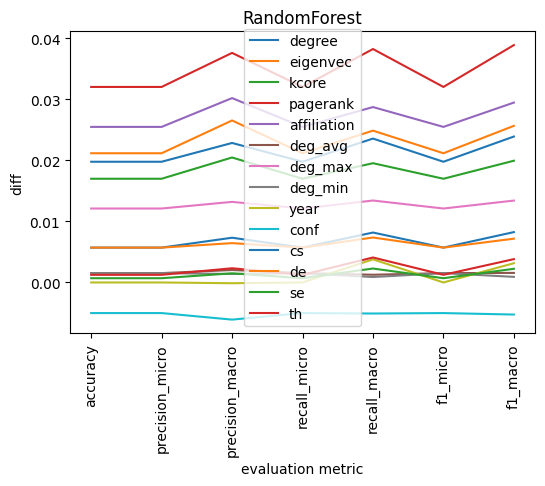

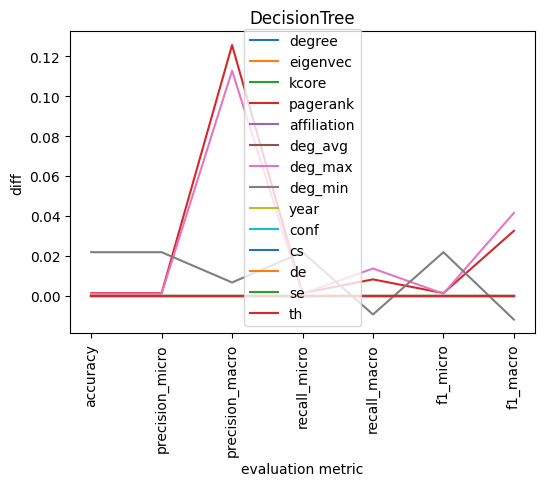

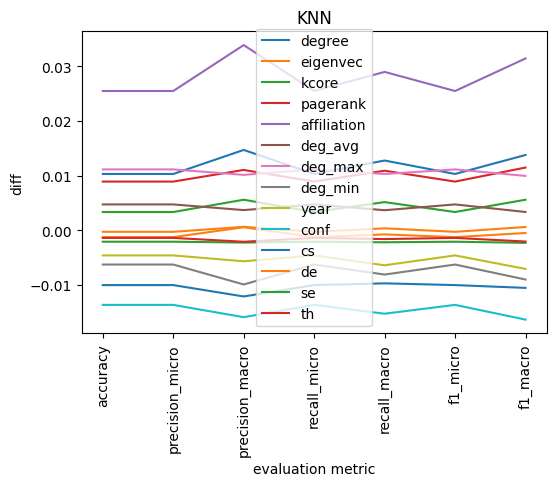

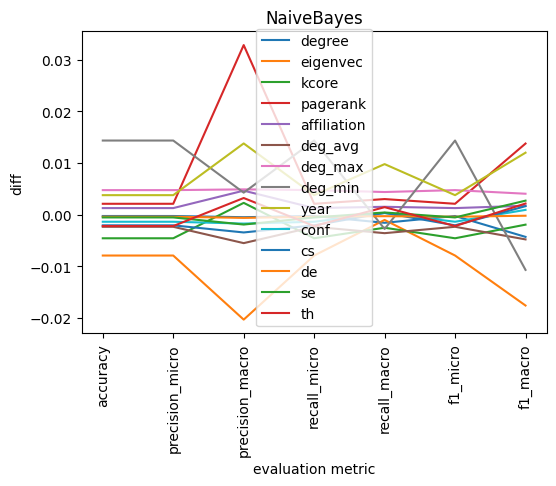

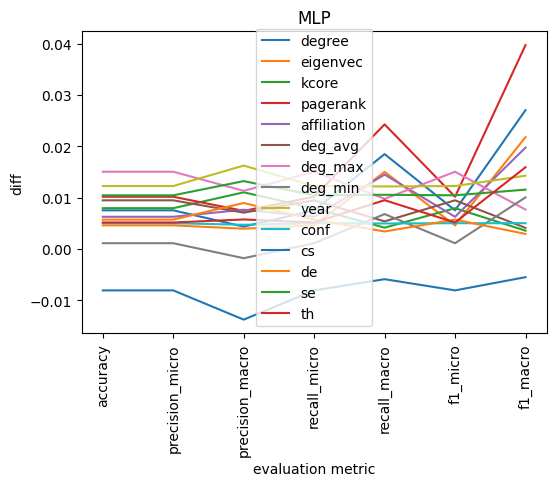

In [731]:
models = property2eval2model["all"]["accuracy"].keys()
for modelname in models:
    plt.figure(dpi=100, figsize=(6,4))
    xs = list(property2eval2model["all"].keys())
    all_ys = []
    for x in xs:
        all_ys.append(property2eval2model["all"][x][modelname])
    
    for prop in property2eval2model.keys():
        if prop == "all":
            continue
        ys = []
        for i, x in enumerate(xs):
            y = all_ys[i] - property2eval2model[prop][x][modelname]
            ys.append(y)
        plt.plot(xs, ys, label=prop)
    plt.xlabel("evaluation metric")
    plt.ylabel("diff")
    plt.legend(bbox_to_anchor=(1, 0.5))
    plt.title(modelname)
    plt.xticks(rotation=90)
    plt.show()
    plt.close()

In [ ]:
# aggregate model
aggregate_dict = defaultdict(dict)
models = property2eval2model["all"]["accuracy"].keys()
xs = list(property2eval2model["all"].keys())

for prop in property2eval2model.keys():
    for x in xs:
        aggregate_dict[prop][x] = np.mean(np.array([property2eval2model[prop][x][model_name] for model_name in models]))

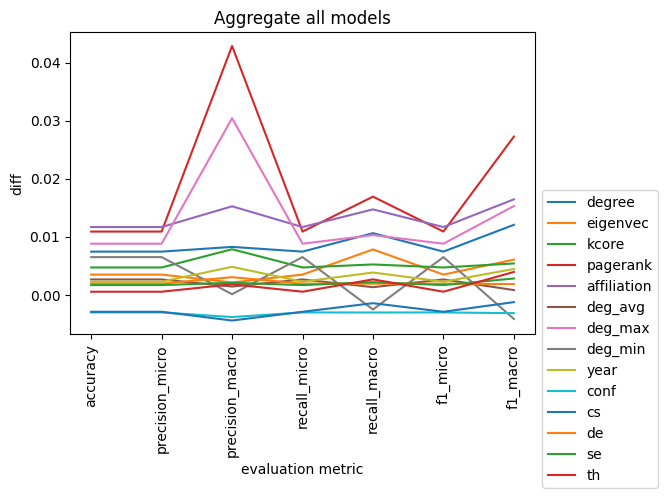

In [734]:
plt.figure(dpi=100, figsize=(6,4))
all_ys = []
for x in xs:
    all_ys.append(aggregate_dict["all"][x])

for prop in aggregate_dict.keys():
    if prop == "all":
        continue
    ys = []
    for i, x in enumerate(xs):
        y = all_ys[i] - aggregate_dict[prop][x]
        ys.append(y)
    plt.plot(xs, ys, label=prop)
plt.xlabel("evaluation metric")
plt.ylabel("diff")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.title("Aggregate all models")
plt.xticks(rotation=90)
plt.show()
plt.close()